In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

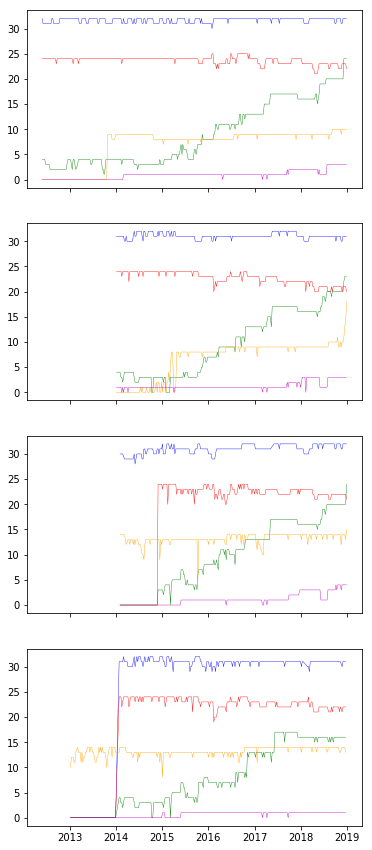

In [12]:
fig,ax = plt.subplots(4,1,sharex=True,figsize=(6,15))

for sol,a in zip(['CODE','ESA','GFZ','WUM'],ax):
    df = pd.read_csv('./orbity/{}_SATELLITES'.format(sol),header=None,sep='\s+')
    df.columns = ['year','month','day','GPS','GLONASS','Galileo','BeiDou','QZSS']
    df['date'] = pd.to_datetime(df[['year','month','day']])

    df.set_index('date',inplace=True)
    df = df[df.index<'2019-01-01']
    df.index = pd.to_datetime(df.index)

    for sys,c in zip(['GPS','GLONASS','Galileo','BeiDou','QZSS'],
                     ['b','r','g','orange','m']):
        a.plot(df.index,df[sys],linewidth=0.4,color=c)